In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import mannwhitneyu, median_abs_deviation

# statistical annotation
def p_annotation(p, x1, x2, y, h=0.005, color='k',linewidth=3, font=20):
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=linewidth, c=color)
    plt.text((x1+x2)*.5, y+h, f'P = {p:.5f}', ha='center', va='bottom', color=color, fontsize=font)

### Define the fitting models

In [2]:
# Define the logistic growth rate model
def area_logistic(t, a0, r, k):
    """
    Logistic growth function
    -------------------------
    t  : Time
    a0 : Area at time zer0
    r  : Growth rate
    k  : Carrying capacity
    """
    return k / (1 + (k/a0 - 1)*np.exp(-r*t))

def der1_area_logistic(t, a0, r, k):
    A = k / (1 + (k/a0 - 1)*np.exp(-r*t))
    return r*A*(1-A/k)

def der2_area_logistic(t, a0, r, k):
    A  = k / (1 + (k/a0 - 1)*np.exp(-r*t))
    Ak = A/k
    return (r**2)*A*(1-Ak)*(1-2*Ak)

# Define the Richards logistic growth rate model
def area_Rlogistic(t, a0, r, k, u):
    """
    Generalised logistic function (Richard's curve)
    -----------------------------------------------
    t  : Time
    a0 : Area at time zer0
    r  : Growth rate
    k  : Carrying capacity
    u  : Affects near which asymptote maximum growth occurs
    """
    return k / (1 + ((k/a0)**u - 1)*np.exp(-r*u*t))**(1/u)

def der1_area_Rlogistic(t, a0, r, k, u):
    A = k / (1 + ((k/a0)**u - 1)*np.exp(-r*u*t))**(1/u)
    return r*A*(1-(A/k)**u)

def der2_area_Rlogistic(t, a0, r, k, u):
    A   = k / (1 + ((k/a0)**u - 1)*np.exp(-r*u*t))**(1/u)
    Aku = (A/k)**u
    return (r**2)*A*(1-Aku)*(1-(1+u)*Aku)

### Read the data frame and show a summary of the growth curves and the fitting models

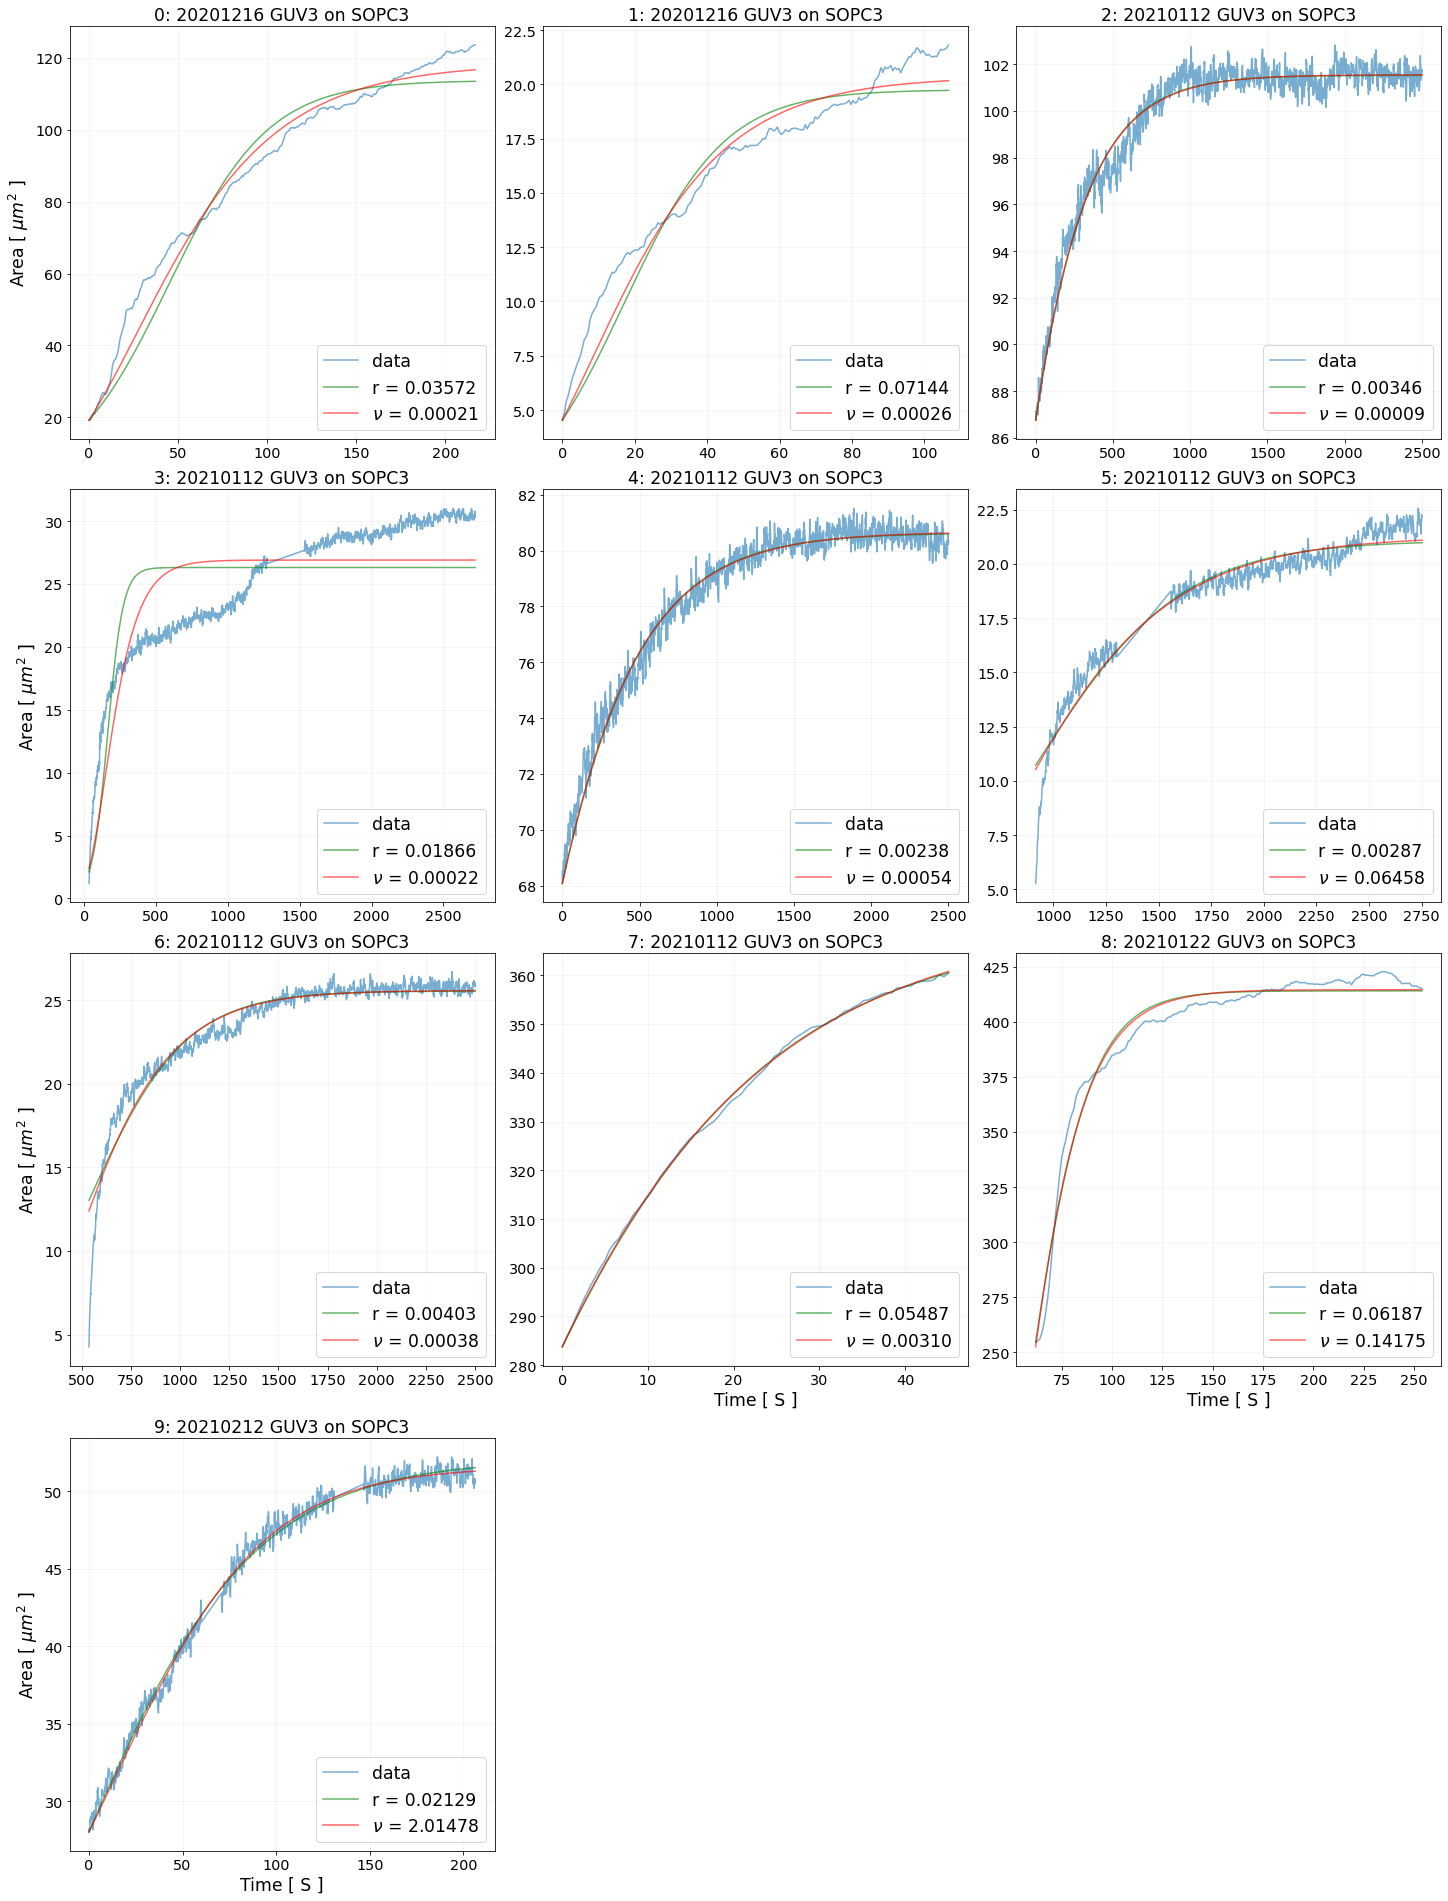

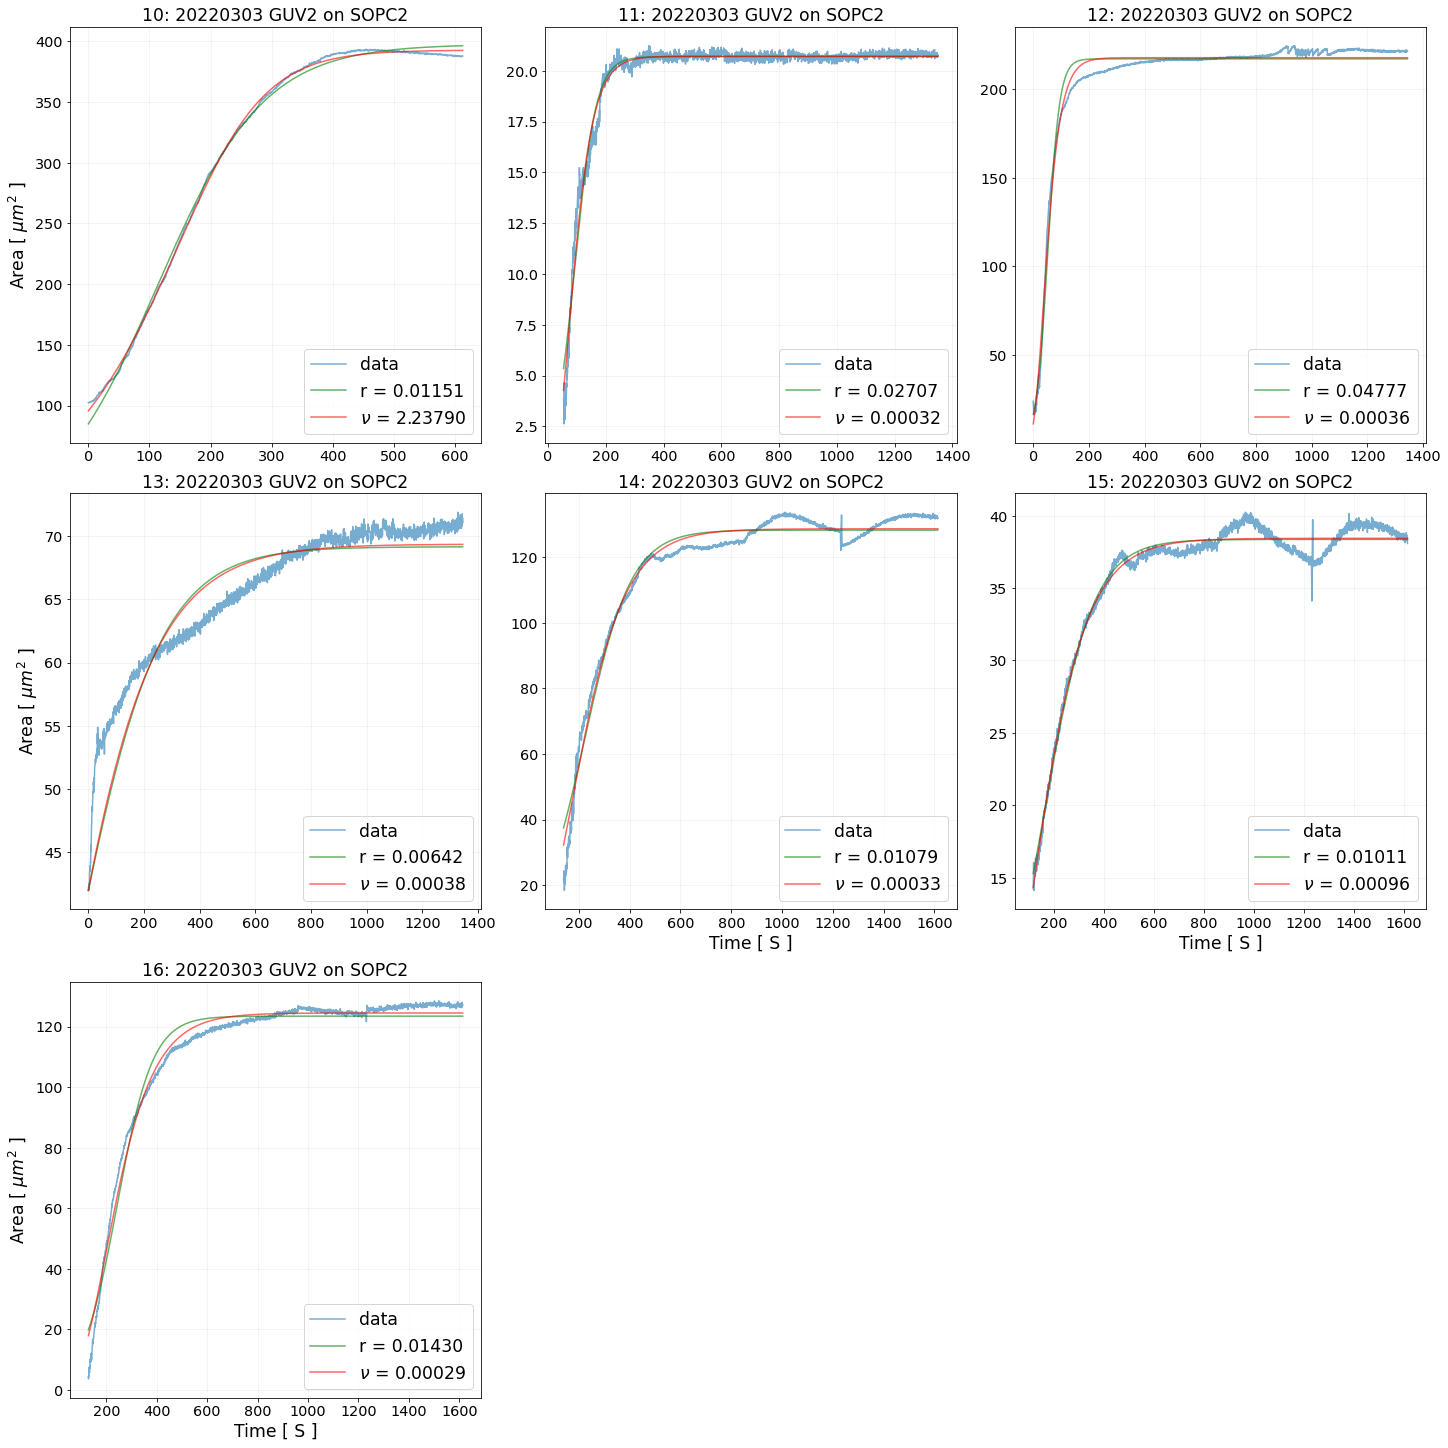

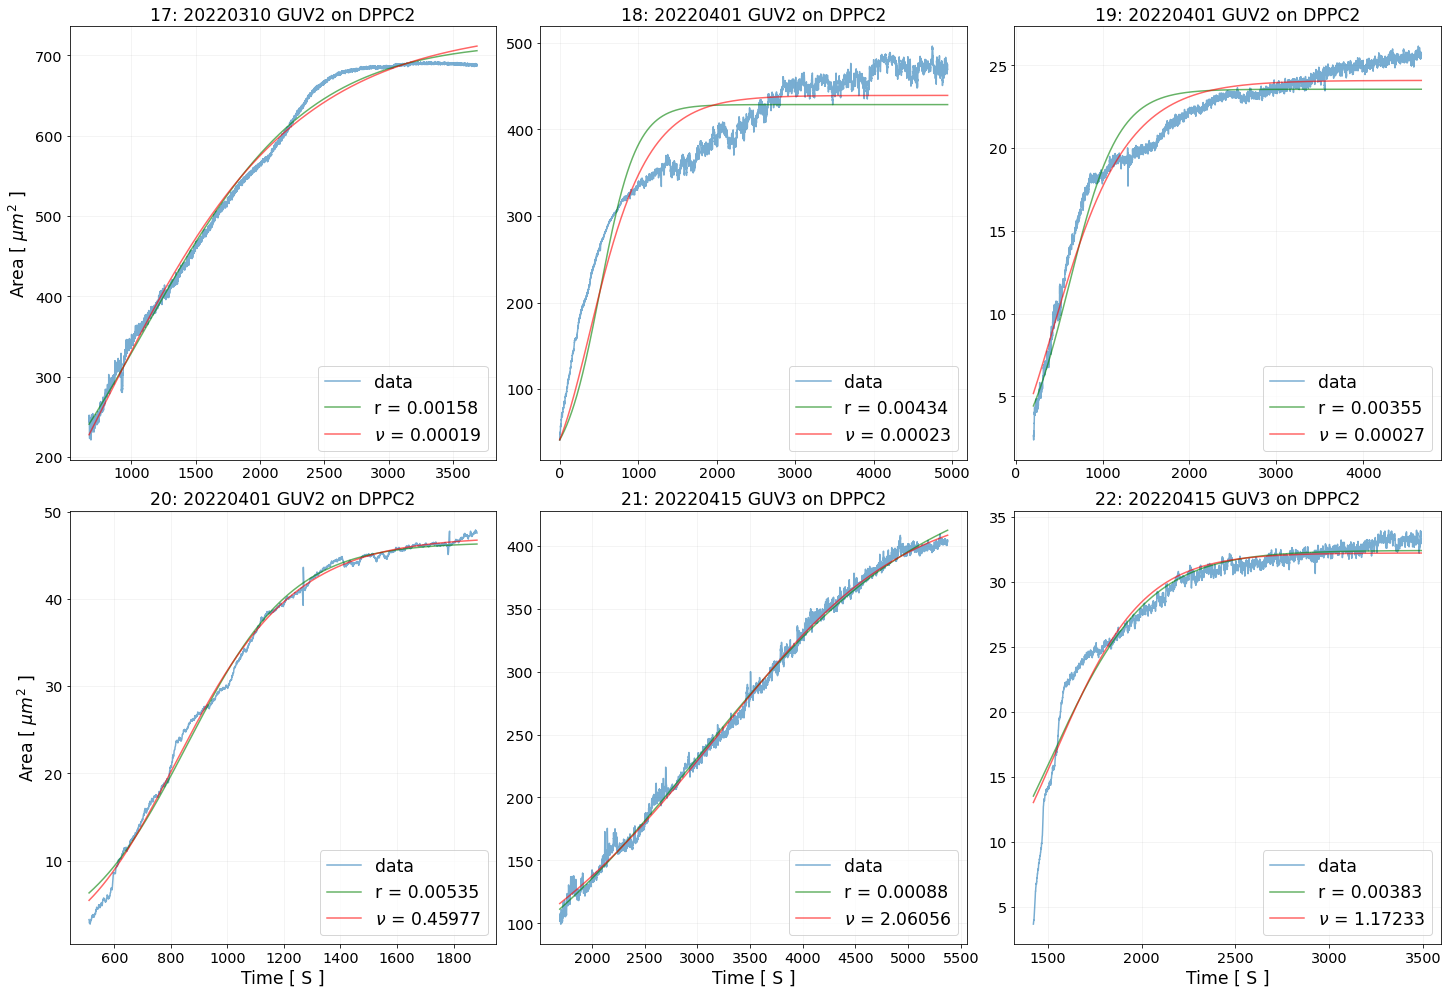

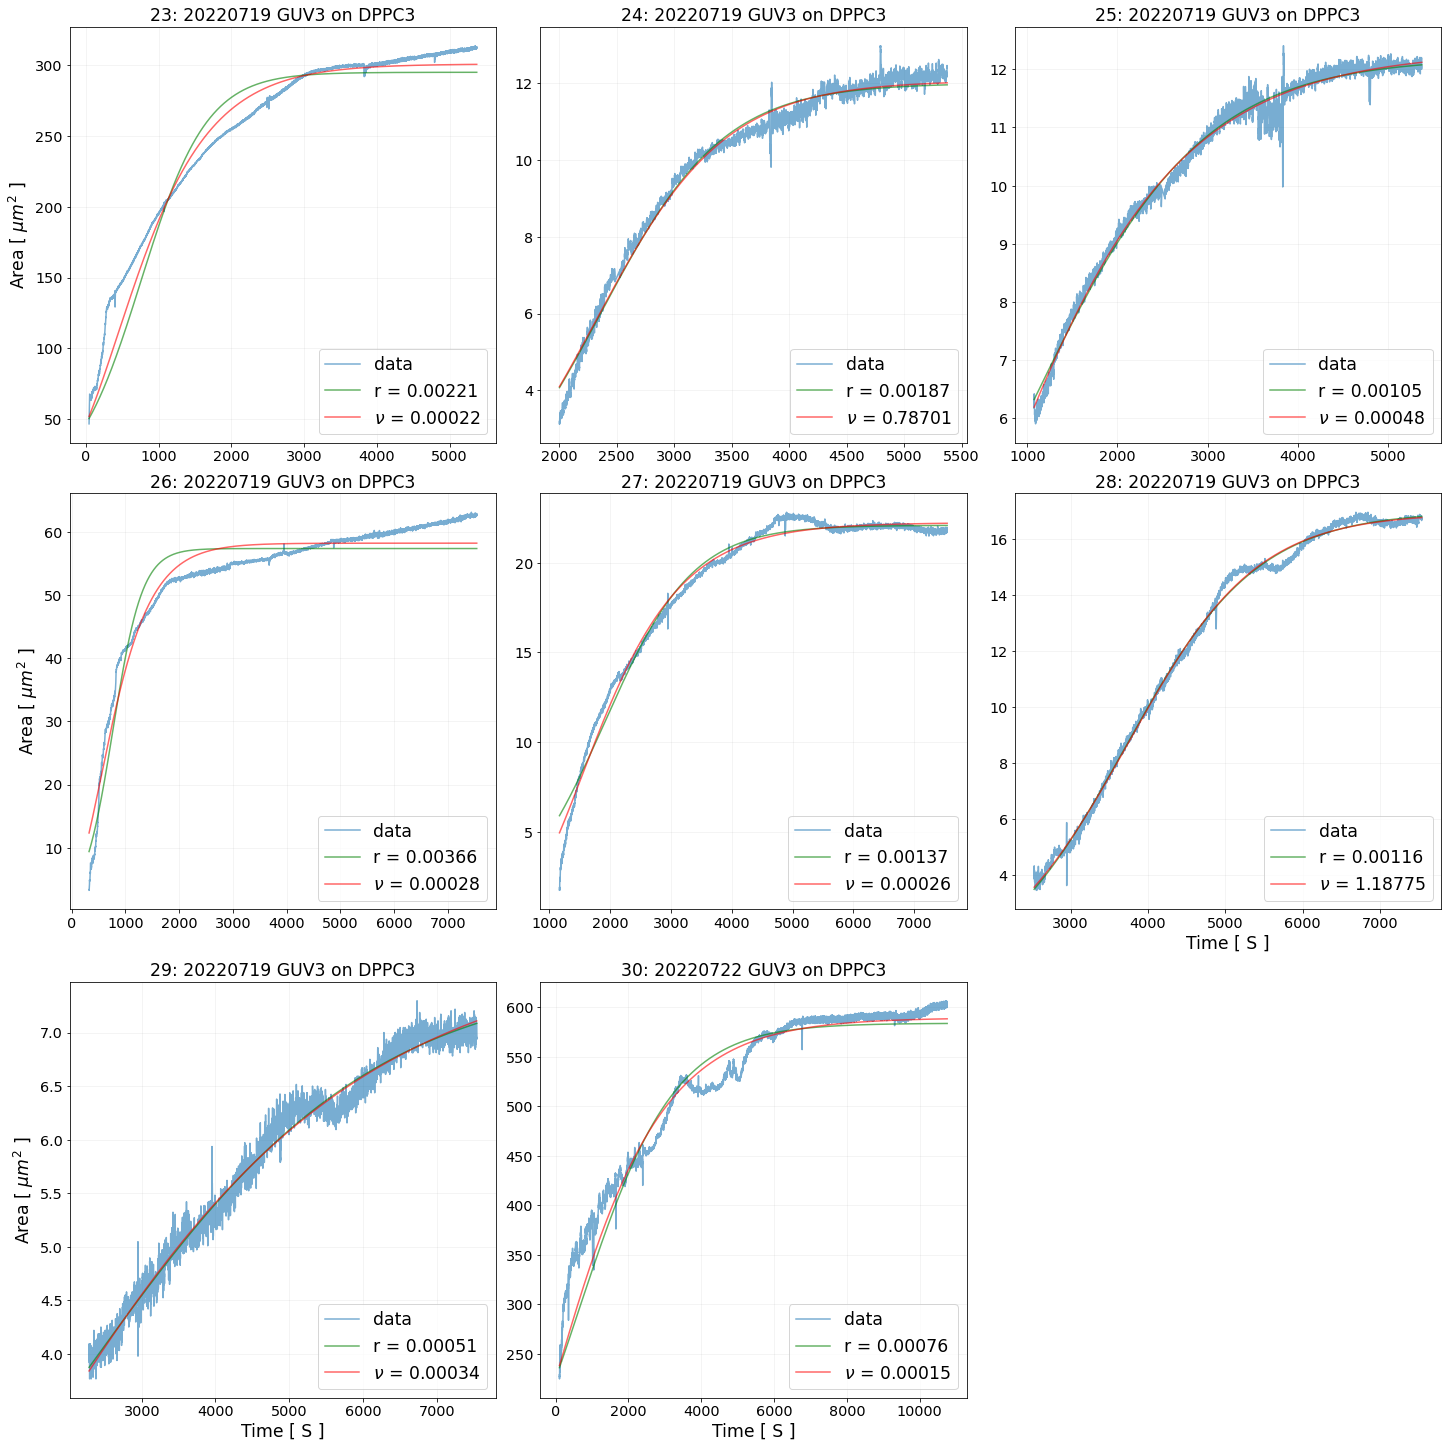

In [3]:
# Read the area curves table
df = pd.read_pickle('Results/manipulated_area_curves.pkl')

parameters_logistic_sopc3, parameters_Rlogistic_sopc3 = [], []
for i in range(10):
    # Read the time and area
    t, A = df['Time'][i], df['Area'][i]
    
    # Compute the maximum and minimum of the area
    area_max = np.max(A)
    area_min = np.min(A)
    
    # Fit a logistic growth function to the curves  k / (1 + (k/a0 - 1)*np.exp(-r*t)) with parameters a0, r, k
    popt_logistic, _  = curve_fit(area_logistic, t, A,
                                  p0=(1, 0.01, area_max),
                                  bounds=([0.1, 0.00001, area_min], [area_min, 10, 2*area_max]))
    
    # Fit a Richards logistic growth function to the curves  k / (1 + ((k/a0)**u - 1)*np.exp(-r*u*t))**(1/u) with parameters a0, r, k, u
    popt_Rlogistic, _ = curve_fit(area_Rlogistic, t, A, maxfev=5000,
                                  p0=(1, 0.01, area_max, 1),
                                  bounds=([0.1, 0.00001, area_min, 0], [area_min, 10000, 2*area_max, 10]))
    
    # Append the fitted parameters to lists
    parameters_logistic_sopc3.append(popt_logistic)
    parameters_Rlogistic_sopc3.append(popt_Rlogistic)
    
    # Define the figure size only once
    if i==0: plt.subplots(4, 3, figsize=(20, 26.3), constrained_layout=True)
    
    plt.subplot(4, 3, i+1)
    plt.plot(t, A, label='data', alpha = 0.6)                                                    # data
    plt.plot(t, area_logistic(t, *popt_logistic), label=f'r = {popt_logistic[1]:.5f}', alpha = 0.6, color= 'g')     # logistic
    plt.plot(t, area_Rlogistic(t, *popt_Rlogistic), label=f'$\u03BD$ = {popt_Rlogistic[3]:.5f}', alpha = 0.6, color= 'r')  # Rlogistic
    plt.title(f'{i}: {df["Date"][i]} {df["Discription"][i]}', fontsize='xx-large')
    if i > 6: plt.xlabel('Time [ S ]', fontsize='xx-large')
    if i % 3 == 0: plt.ylabel('Area [ $\mu m^2$ ]', fontsize='xx-large')
    plt.xticks(fontsize='x-large')
    plt.yticks(fontsize='x-large')
    plt.grid(color = 'gray', alpha = 0.1)
    plt.legend(loc='lower right', fontsize='xx-large')
    
for k in range(10,12):
    plt.subplot(4, 3, k+1)
    plt.axis('off')
    
plt.savefig('Results/area_curves_sopc3')
plt.show()

parameters_logistic_sopc2, parameters_Rlogistic_sopc2 = [], []
for i in range(7):
    # Increment the suffix
    j = i + 10
    # Read the time and area
    t, A = df['Time'][j], df['Area'][j]
    
    # Compute the maximum and minimum of the area
    area_max = np.max(A)
    area_min = np.min(A)
    
    # Fit a logistic growth function to the curves  k / (1 + (k/a0 - 1)*np.exp(-r*t)) with parameters a0, r, k
    popt_logistic, _  = curve_fit(area_logistic, t, A,
                                  p0=(1, 0.01, area_max),
                                  bounds=([0.1, 0.00001, area_min], [area_min, 10, 2*area_max]))
    
    # Fit a Richards logistic growth function to the curves  k / (1 + ((k/a0)**u - 1)*np.exp(-r*u*t))**(1/u) with parameters a0, r, k, u
    popt_Rlogistic, _ = curve_fit(area_Rlogistic, t, A, maxfev=5000,
                                  p0=(1, 0.01, area_max, 1),
                                  bounds=([0.1, 0.00001, area_min, 0], [area_min, 10000, 2*area_max, 10]))
    
    # Append the fitted parameters to lists
    parameters_logistic_sopc2.append(popt_logistic)
    parameters_Rlogistic_sopc2.append(popt_Rlogistic)
    
    # Define the figure size only once
    if i==0: plt.subplots(3, 3, figsize=(20, 20), constrained_layout=True)
    
    plt.subplot(3, 3, i+1)
    plt.plot(t, A, label='data', alpha = 0.6)                                                    # data
    plt.plot(t, area_logistic(t, *popt_logistic), label=f'r = {popt_logistic[1]:.5f}', alpha = 0.6, color= 'g')     # logistic
    plt.plot(t, area_Rlogistic(t, *popt_Rlogistic), label=f'$\u03BD$ = {popt_Rlogistic[3]:.5f}', alpha = 0.6, color= 'r')  # Rlogistic
    plt.title(f'{j}: {df["Date"][j]} {df["Discription"][j]}', fontsize='xx-large')
    if i > 3: plt.xlabel('Time [ S ]', fontsize='xx-large')
    if i % 3 == 0: plt.ylabel('Area [ $\mu m^2$ ]', fontsize='xx-large')
    plt.xticks(fontsize='x-large')
    plt.yticks(fontsize='x-large')
    plt.grid(color = 'gray', alpha = 0.1)
    plt.legend(loc='lower right', fontsize='xx-large')
    
for k in range(7,9):
    plt.subplot(3, 3, k+1)
    plt.axis('off')
    
plt.savefig('Results/area_curves_sopc2')
plt.show()

parameters_logistic_dppc2, parameters_Rlogistic_dppc2 = [], []
for i in range(6):
    # Increment the suffix
    j = i + 17
    # Read the time and area
    t, A = df['Time'][j], df['Area'][j]
    
    # Compute the maximum and minimum of the area
    area_max = np.max(A)
    area_min = np.min(A)
    
    # Fit a logistic growth function to the curves  k / (1 + (k/a0 - 1)*np.exp(-r*t)) with parameters a0, r, k
    popt_logistic, _  = curve_fit(area_logistic, t, A,
                                  p0=(1, 0.01, area_max),
                                  bounds=([0.1, 0.00001, area_min], [area_min, 10, 2*area_max]))
    
    # Fit a Richards logistic growth function to the curves  k / (1 + ((k/a0)**u - 1)*np.exp(-r*u*t))**(1/u) with parameters a0, r, k, u
    popt_Rlogistic, _ = curve_fit(area_Rlogistic, t, A, maxfev=5000,
                                  p0=(1, 0.01, area_max, 1),
                                  bounds=([0.1, 0.00001, area_min, 0], [area_min, 10000, 2*area_max, 10]))
    
    # Append the fitted parameters to lists
    parameters_logistic_dppc2.append(popt_logistic)
    parameters_Rlogistic_dppc2.append(popt_Rlogistic)
    
    # Define the figure size only once
    if i==0: plt.subplots(2, 3, figsize=(20, 13.7), constrained_layout=True)
    
    plt.subplot(2, 3, i+1)
    plt.plot(t, A, label='data', alpha = 0.6)                                                    # data
    plt.plot(t, area_logistic(t, *popt_logistic), label=f'r = {popt_logistic[1]:.5f}', alpha = 0.6, color= 'g')     # logistic
    plt.plot(t, area_Rlogistic(t, *popt_Rlogistic), label=f'$\u03BD$ = {popt_Rlogistic[3]:.5f}', alpha = 0.6, color= 'r')  # Rlogistic
    plt.title(f'{j}: {df["Date"][j]} {df["Discription"][j]}', fontsize='xx-large')
    if i > 2: plt.xlabel('Time [ S ]', fontsize='xx-large')
    if i % 3 == 0: plt.ylabel('Area [ $\mu m^2$ ]', fontsize='xx-large')
    plt.xticks(fontsize='x-large')
    plt.yticks(fontsize='x-large')
    plt.grid(color = 'gray', alpha = 0.1)
    plt.legend(loc='lower right', fontsize='xx-large')
    
plt.savefig('Results/area_curves_dppc2')
plt.show()

parameters_logistic_dppc3, parameters_Rlogistic_dppc3 = [], []
for i in range(8):
    # Increment the suffix
    j = i + 23
    # Read the time and area
    t, A = df['Time'][j], df['Area'][j]
    
    # Compute the maximum and minimum of the area
    area_max = np.max(A)
    area_min = np.min(A)
    
    # Fit a logistic growth function to the curves  k / (1 + (k/a0 - 1)*np.exp(-r*t)) with parameters a0, r, k
    popt_logistic, _  = curve_fit(area_logistic, t, A,
                                  p0=(1, 0.01, area_max),
                                  bounds=([0.1, 0.00001, area_min], [area_min, 10, 2*area_max]))
    
    # Fit a Richards logistic growth function to the curves  k / (1 + ((k/a0)**u - 1)*np.exp(-r*u*t))**(1/u) with parameters a0, r, k, u
    popt_Rlogistic, _ = curve_fit(area_Rlogistic, t, A, maxfev=5000,
                                  p0=(1, 0.01, area_max, 1),
                                  bounds=([0.1, 0.00001, area_min, 0], [area_min, 10000, 2*area_max, 10]))
    
    # Append the fitted parameters to lists
    parameters_logistic_dppc3.append(popt_logistic)
    parameters_Rlogistic_dppc3.append(popt_Rlogistic)
    
    # Define the figure size only once
    if i==0: plt.subplots(3, 3, figsize=(20, 20), constrained_layout=True)
    
    plt.subplot(3, 3, i+1)
    plt.plot(t, A, label='data', alpha = 0.6)                                                    # data
    plt.plot(t, area_logistic(t, *popt_logistic), label=f'r = {popt_logistic[1]:.5f}', alpha = 0.6, color= 'g')     # logistic
    plt.plot(t, area_Rlogistic(t, *popt_Rlogistic), label=f'$\u03BD$ = {popt_Rlogistic[3]:.5f}', alpha = 0.6, color= 'r')  # Rlogistic
    plt.title(f'{j}: {df["Date"][j]} {df["Discription"][j]}', fontsize='xx-large')
    if i > 4: plt.xlabel('Time [ S ]', fontsize='xx-large')
    if i % 3 == 0: plt.ylabel('Area [ $\mu m^2$ ]', fontsize='xx-large')
    plt.xticks(fontsize='x-large')
    plt.yticks(fontsize='x-large')
    plt.grid(color = 'gray', alpha = 0.1)
    plt.legend(loc='lower right', fontsize='xx-large')
    
for k in range(8,9):
    plt.subplot(3, 3, k+1)
    plt.axis('off')
    
plt.savefig('Results/area_curves_dppc3')
plt.show()

### Calculate the average differences and the Mann-Whitney U test

In [4]:
# Extract the logistic parameters for each fluidity and concentration
r_sopc2 = np.array([parameter[1] for parameter in parameters_logistic_sopc2])
k_sopc2 = np.array([parameter[2] for parameter in parameters_logistic_sopc2])
a_sopc2 = np.array([parameter[0] for parameter in parameters_logistic_sopc2])

r_sopc3 = np.array([parameter[1] for parameter in parameters_logistic_sopc3])
k_sopc3 = np.array([parameter[2] for parameter in parameters_logistic_sopc3])
a_sopc3 = np.array([parameter[0] for parameter in parameters_logistic_sopc3])

r_dppc2 = np.array([parameter[1] for parameter in parameters_logistic_dppc2])
k_dppc2 = np.array([parameter[2] for parameter in parameters_logistic_dppc2])
a_dppc2 = np.array([parameter[0] for parameter in parameters_logistic_dppc2])

r_dppc3 = np.array([parameter[1] for parameter in parameters_logistic_dppc3])
k_dppc3 = np.array([parameter[2] for parameter in parameters_logistic_dppc3])
a_dppc3 = np.array([parameter[0] for parameter in parameters_logistic_dppc3])


# Extract the logistic parameters for each SLB tyoe
r_sopc = np.array([parameter[1] for parameter in parameters_logistic_sopc2 + parameters_logistic_sopc3])
k_sopc = np.array([parameter[2] for parameter in parameters_logistic_sopc2 + parameters_logistic_sopc3])
a_sopc = np.array([parameter[0] for parameter in parameters_logistic_sopc2 + parameters_logistic_sopc3])

r_dppc = np.array([parameter[1] for parameter in parameters_logistic_dppc2 + parameters_logistic_dppc3])
k_dppc = np.array([parameter[2] for parameter in parameters_logistic_dppc2 + parameters_logistic_dppc3])
a_dppc = np.array([parameter[0] for parameter in parameters_logistic_dppc2 + parameters_logistic_dppc3])


# Calculate the average differences
dr_slb  = (np.mean(r_sopc ) - np.mean(r_dppc )) / np.max([np.mean(r_sopc ), np.mean(r_dppc )])
dr_sopc = (np.mean(r_sopc3) - np.mean(r_sopc2)) / np.max([np.mean(r_sopc2), np.mean(r_dppc3)])
dr_dppc = (np.mean(r_dppc3) - np.mean(r_dppc2)) / np.max([np.mean(r_dppc2), np.mean(r_dppc3)])

# Calculate the Mann-Whitney U test P-value
_, p_slb  = mannwhitneyu(r_sopc , r_dppc )
_, p_sopc = mannwhitneyu(r_sopc2, r_sopc3)
_, p_dppc = mannwhitneyu(r_dppc2, r_dppc3)

print(f'SOPC vs DPPC\n<dr> = {dr_slb}\n P   = {p_slb:.6f}\n')
print(f'SOPC 2% vs SOPC 3%\n<dr> = {dr_sopc}\n P   = {p_sopc:.6f}\n')
print(f'DPPC 2% vs DPPC 3%\n<dr> = {dr_dppc}\n P   = {p_dppc:.6f}')

SOPC vs DPPC
<dr> = 0.9036325880843789
 P   = 0.000056

SOPC 2% vs SOPC 3%
<dr> = 0.5128029877630569
 P   = 0.886775

DPPC 2% vs DPPC 3%
<dr> = -0.5165012826865866
 P   = 0.081252


### Plot box plots

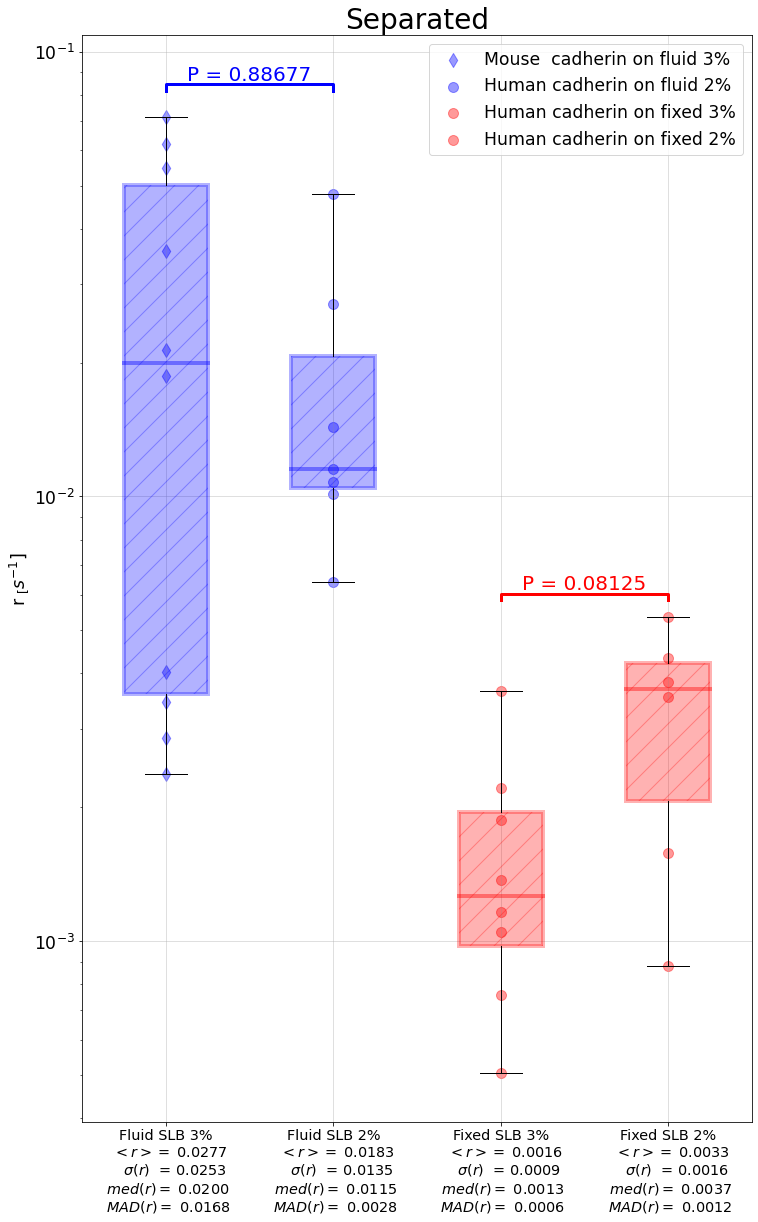

In [5]:
plt.figure(figsize=(12,20))     # 16.54,20

# Define the boxes
bp = plt.boxplot([r_sopc3, r_sopc2, r_dppc3, r_dppc2],
                labels = [f'Fluid SLB 3%\n  $<r>=$ {r_sopc3.mean():.4f}\n    $\sigma(r)$  = {r_sopc3.std():.4f} \n $med(r)=$ {np.median(r_sopc3):.4f}\n $MAD(r)=$ {median_abs_deviation(r_sopc3):.4f}',
                          f'Fluid SLB 2%\n  $<r>=$ {r_sopc2.mean():.4f}\n    $\sigma(r)$  = {r_sopc2.std():.4f} \n $med(r)=$ {np.median(r_sopc2):.4f}\n $MAD(r)=$ {median_abs_deviation(r_sopc2):.4f}',
                          f'Fixed SLB 3%\n  $<r>=$ {r_dppc3.mean():.4f}\n    $\sigma(r)$  = {r_dppc3.std():.4f} \n $med(r)=$ {np.median(r_dppc3):.4f}\n $MAD(r)=$ {median_abs_deviation(r_dppc3):.4f}',
                          f'Fixed SLB 2%\n  $<r>=$ {r_dppc2.mean():.4f}\n    $\sigma(r)$  = {r_dppc2.std():.4f} \n $med(r)=$ {np.median(r_dppc2):.4f}\n $MAD(r)=$ {median_abs_deviation(r_dppc2):.4f}'],
                whis = 3.5,
                widths = 0.5,
                patch_artist=True);

# Customize the boxes
bp['boxes'][0].set(color='blue', hatch='/', linewidth=4, alpha=0.3)
bp['boxes'][1].set(color='blue', hatch='/', linewidth=4, alpha=0.3)
bp['boxes'][2].set(color='red' , hatch='/', linewidth=4, alpha=0.3)
bp['boxes'][3].set(color='red' , hatch='/', linewidth=4, alpha=0.3)

# Customize the Median line
bp['medians'][0].set(color='blue', linewidth=4, alpha=0.4)
bp['medians'][1].set(color='blue', linewidth=4, alpha=0.4)
bp['medians'][2].set(color='red' , linewidth=4, alpha=0.4)
bp['medians'][3].set(color='red' , linewidth=4, alpha=0.4)


# Plot the scattered points
plt.scatter(x = [1] * len(r_sopc3), y = r_sopc3, color='blue', s=100, alpha=0.4, label='Mouse  cadherin on fluid 3%', marker='d')
plt.scatter(x = [2] * len(r_sopc2), y = r_sopc2, color='blue', s=100, alpha=0.4, label='Human cadherin on fluid 2%')
plt.scatter(x = [3] * len(r_dppc3), y = r_dppc3, color='red' , s=100, alpha=0.4, label='Human cadherin on fixed 3%')
plt.scatter(x = [4] * len(r_dppc2), y = r_dppc2, color='red' , s=100, alpha=0.4, label='Human cadherin on fixed 2%')

# statistical annotation
p_annotation(p_sopc, 1, 2, r_sopc3.max() + 0.01, color='blue', h=0.003)
p_annotation(p_dppc, 3, 4, r_dppc2.max() + 0.0005, color='red', h= 0.0002)

# Customize the table
plt.ylabel('r $_[s^{-1}$]', fontsize= 'xx-large')
plt.xticks(fontsize= 'x-large')
plt.yticks(fontsize= 'xx-large')
plt.yscale('log')
plt.title('Separated', fontsize=28)
plt.grid(alpha=0.5)
plt.legend(fontsize='xx-large')

# Save the figure
plt.savefig("Results/boxplot_growth_rate_separated")
plt.show()

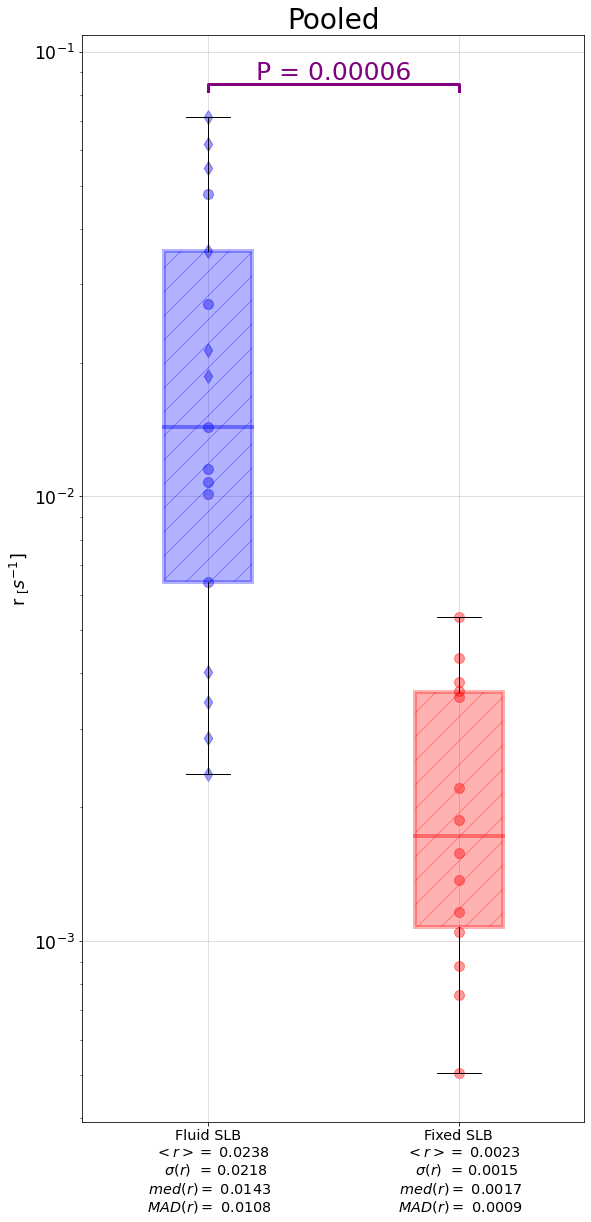

In [6]:
plt.figure(figsize=(9,20))     # 16.54,20

# Define the boxes
bp = plt.boxplot([r_sopc, r_dppc],
                labels = [f'Fluid SLB\n  $<r>=$ {r_sopc.mean():.4f}\n    $\sigma(r)$  = {r_sopc.std():.4f} \n $med(r)=$ {np.median(r_sopc):.4f}\n $MAD(r)=$ {median_abs_deviation(r_sopc):.4f}',
                          f'Fixed SLB\n  $<r>=$ {r_dppc.mean():.4f}\n    $\sigma(r)$  = {r_dppc.std():.4f} \n $med(r)=$ {np.median(r_dppc):.4f}\n $MAD(r)=$ {median_abs_deviation(r_dppc):.4f}'],
                whis = 3.5,
                widths = 0.35,
                patch_artist=True);

# Customize the boxes
bp['boxes'][0].set(color = 'blue', hatch = '/', linewidth=4, alpha = 0.3)
bp['boxes'][1].set(color = 'red' , hatch = '/', linewidth=4, alpha = 0.3)

# Customize the Median line
bp['medians'][0].set(color = 'blue', linewidth=4, alpha = 0.4)
bp['medians'][1].set(color = 'red' , linewidth=4, alpha = 0.4)


# Plot the scattered points
plt.scatter(x = [1] * len(r_sopc3), y=r_sopc3, color='blue', s=100, alpha=0.4, label='Mouse  cadherin on fluid SLB 3%', marker='d')
plt.scatter(x = [1] * len(r_sopc2), y=r_sopc2, color='blue', s=100, alpha=0.4, label='Human cadherin on fluid SLB 2%')
plt.scatter(x = [2] * len(r_dppc3), y=r_dppc3, color='red' , s=100, alpha=0.4, label='Human cadherin on fixed SLB 3%')
plt.scatter(x = [2] * len(r_dppc2), y=r_dppc2, color='red' , s=100, alpha=0.4, label='Human cadherin on fixed SLB 2%')

# statistical annotation
p_annotation(p_slb, 1, 2, r_sopc.max() + 0.01, color='purple', h=0.003, font=25)

# Customize the table
plt.ylabel('r $_[s^{-1}$]', fontsize= 'xx-large')
plt.xticks(fontsize= 'x-large')
plt.yticks(fontsize= 'xx-large')
plt.yscale('log')
plt.title('Pooled', fontsize=28)
plt.grid(alpha=0.5)
# plt.legend(fontsize='x-large')

# Save the figure
plt.savefig("Results/boxplot_growth_rate_mixed")
plt.show()

### Plot the growth rate vs carrying capacity

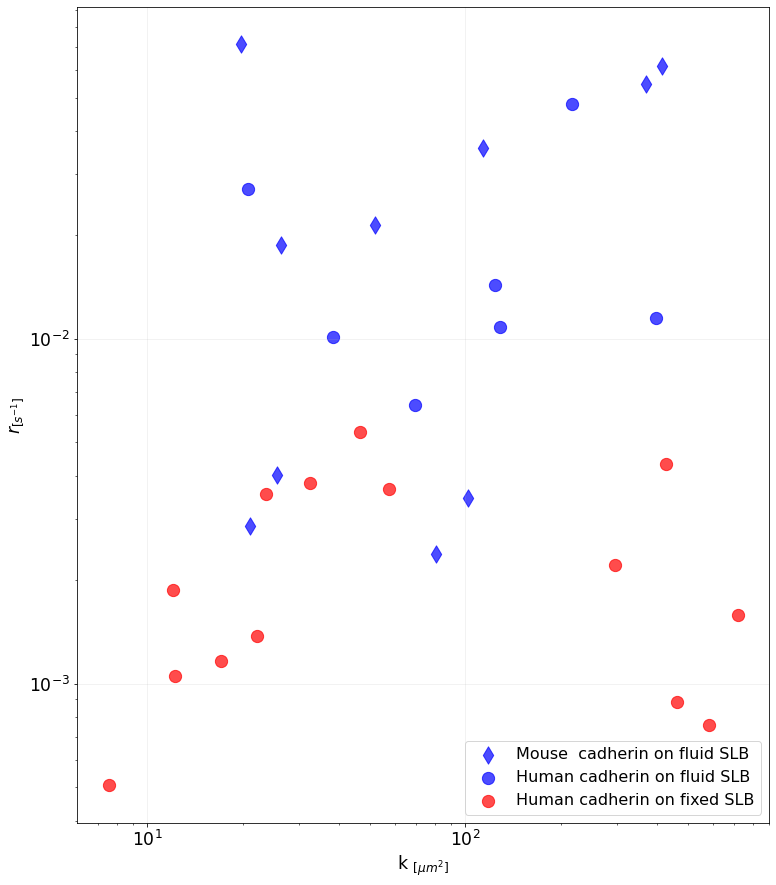

In [7]:
# # Calculate the slope and intercept of the growth rate and carrying capacity
# m, b = np.polyfit(k, r, 1)

# # Calculate the Pearson correlation coefficient
# p = np.corrcoef(k, r)[0][1]

# Plot the results
plt.figure(figsize=(12.4,15))

# Scatter the growth rate against the carrying capacity
plt.scatter(k_sopc3, r_sopc3, color='blue', s = 150, alpha = 0.7, label='Mouse  cadherin on fluid SLB', marker='d')
plt.scatter(k_sopc2, r_sopc2, color='blue', s = 150, alpha = 0.7, label='Human cadherin on fluid SLB')
plt.scatter(k_dppc, r_dppc, color='red', s = 150, alpha = 0.7, label='Human cadherin on fixed SLB')

# # Annotate each data point with it's index and initial area
# for i, A in enumerate(a): plt.annotate(f'[{i}]  {A:.1f}', (r[i], k[i]), fontsize='large')

plt.xlabel('k $_{[\mu m^2]}$', fontsize='xx-large')
plt.ylabel('$r_{[s^{-1}]}$', fontsize='xx-large')
#plt.title(f'Growth rate vs carrying capacity with Pearson correlation coefficient {p:.3f}', fontsize='xx-large')

# plot the fitted line between the data points
# m, b = np.polyfit(k_sopc, r_sopc, 1)
# plt.plot(np.sort(k_sopc), m*np.sort(k_sopc) + b, color='purple', alpha = 0.3, label=f'SOPC slope = {m:.5f}, p = {np.corrcoef(k_sopc, r_sopc)[0][1]:.2f}')

# m, b = np.polyfit(k_dppc, r_dppc, 1)
# plt.plot(np.sort(k_dppc), m*np.sort(k_dppc) + b, color='red', alpha = 0.3, label=f'DPPC slope = {m:.5f}, p = {np.corrcoef(k_dppc, r_dppc)[0][1]:.2f}')

plt.xticks(fontsize='xx-large')
plt.yticks(fontsize='xx-large')
plt.yscale('log')
plt.xscale('log')
plt.grid(alpha = 0.2)
plt.legend(fontsize=16)

plt.savefig('Results/Growth_rate_vs_carrying_capacity')

### Print the 4 tables in latex

In [8]:
# Make data frame for each condition
df_sopc2 = pd.DataFrame({'r':r_sopc2, 'k':k_sopc2, 'a0':a_sopc2})
df_sopc3 = pd.DataFrame({'r':r_sopc3, 'k':k_sopc3, 'a0':a_sopc3})
df_dppc2 = pd.DataFrame({'r':r_dppc2, 'k':k_dppc2, 'a0':a_dppc2})
df_dppc3 = pd.DataFrame({'r':r_dppc3, 'k':k_dppc3, 'a0':a_dppc3})

# print the pdf in latex
# print(df_dppc5.round(2).style.hide(axis="index").to_latex(hrules=True))
print(df_sopc2.round({'r': 4, 'k': 1, 'a0': 1}).to_latex(index=False))
print(df_sopc3.round({'r': 4, 'k': 1, 'a0': 1}).to_latex(index=False))
print(df_dppc2.round({'r': 4, 'k': 1, 'a0': 1}).to_latex(index=False))
print(df_dppc3.round({'r': 4, 'k': 1, 'a0': 1}).to_latex(index=False))

\begin{tabular}{rrr}
\toprule
     r &     k &   a0 \\
\midrule
0.0115 & 397.8 & 84.9 \\
0.0271 &  20.7 &  1.6 \\
0.0478 & 217.1 & 16.3 \\
0.0064 &  69.2 & 42.0 \\
0.0108 & 128.2 & 10.7 \\
0.0101 &  38.4 &  6.4 \\
0.0143 & 123.5 &  3.6 \\
\bottomrule
\end{tabular}

\begin{tabular}{rrr}
\toprule
     r &     k &    a0 \\
\midrule
0.0357 & 113.7 &  19.2 \\
0.0714 &  19.8 &   4.5 \\
0.0035 & 101.5 &  86.7 \\
0.0187 &  26.3 &   1.2 \\
0.0024 &  80.6 &  68.1 \\
0.0029 &  21.1 &   1.5 \\
0.0040 &  25.6 &   2.7 \\
0.0549 & 369.7 & 283.8 \\
0.0619 & 414.0 &  13.8 \\
0.0213 &  52.1 &  28.0 \\
\bottomrule
\end{tabular}

\begin{tabular}{rrr}
\toprule
     r &     k &    a0 \\
\midrule
0.0016 & 717.8 & 107.0 \\
0.0043 & 428.5 &  41.3 \\
0.0035 &  23.6 &   2.4 \\
0.0053 &  46.5 &   0.5 \\
0.0009 & 463.3 &  30.7 \\
0.0038 &  32.4 &   0.1 \\
\bottomrule
\end{tabular}

\begin{tabular}{rrr}
\toprule
     r &     k &    a0 \\
\midrule
0.0022 & 294.7 &  46.8 \\
0.0019 &  12.0 &   0.1 \\
0.0010 &  12.2 & 

/tmp/ipykernel_105856/687726784.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_sopc2.round({'r': 4, 'k': 1, 'a0': 1}).to_latex(index=False))
/tmp/ipykernel_105856/687726784.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_sopc3.round({'r': 4, 'k': 1, 'a0': 1}).to_latex(index=False))
/tmp/ipykernel_105856/687726784.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for f

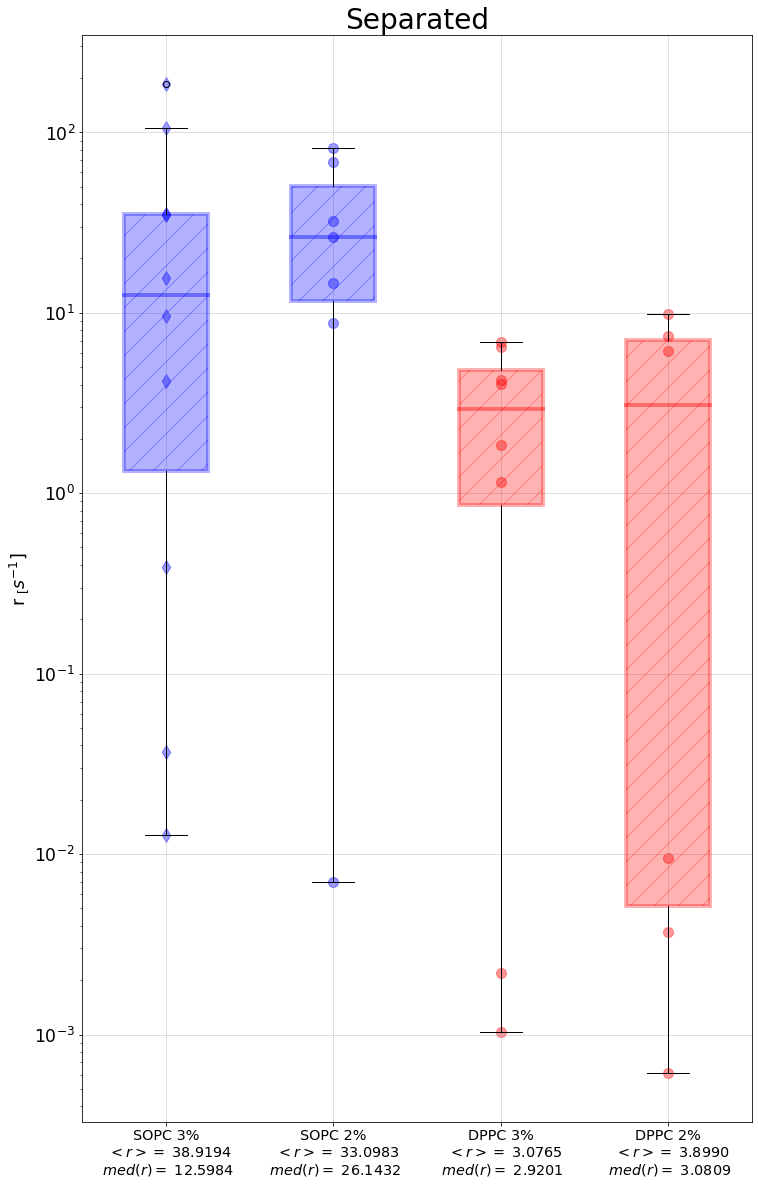

In [9]:
# Extract the logistic parameters excluding the DPPC curve
r_sopc2 = np.array([parameter[1] for parameter in parameters_Rlogistic_sopc2])
k_sopc2 = np.array([parameter[2] for parameter in parameters_Rlogistic_sopc2])
a_sopc2 = np.array([parameter[0] for parameter in parameters_Rlogistic_sopc2])
u_sopc2 = np.array([parameter[3] for parameter in parameters_Rlogistic_sopc2])

r_sopc3 = np.array([parameter[1] for parameter in parameters_Rlogistic_sopc3])
k_sopc3 = np.array([parameter[2] for parameter in parameters_Rlogistic_sopc3])
a_sopc3 = np.array([parameter[0] for parameter in parameters_Rlogistic_sopc3])
u_sopc3 = np.array([parameter[3] for parameter in parameters_Rlogistic_sopc3])

r_dppc2 = np.array([parameter[1] for parameter in parameters_Rlogistic_dppc2])
k_dppc2 = np.array([parameter[2] for parameter in parameters_Rlogistic_dppc2])
a_dppc2 = np.array([parameter[0] for parameter in parameters_Rlogistic_dppc2])
u_dppc2 = np.array([parameter[3] for parameter in parameters_Rlogistic_dppc2])

r_dppc3 = np.array([parameter[1] for parameter in parameters_Rlogistic_dppc3])
k_dppc3 = np.array([parameter[2] for parameter in parameters_Rlogistic_dppc3])
a_dppc3 = np.array([parameter[0] for parameter in parameters_Rlogistic_dppc3])
u_dppc3 = np.array([parameter[3] for parameter in parameters_Rlogistic_dppc3])

plt.figure(figsize=(12,20))     # 16.54,20

# Define the boxes
bp = plt.boxplot([r_sopc3, r_sopc2, r_dppc3, r_dppc2],
                labels = [f'SOPC 3%\n  $<r>=$ {r_sopc3.mean():.4f}\n $med(r)=$ {np.median(r_sopc3):.4f}',
                          f'SOPC 2%\n  $<r>=$ {r_sopc2.mean():.4f}\n $med(r)=$ {np.median(r_sopc2):.4f}',
                          f'DPPC 3%\n  $<r>=$ {r_dppc3.mean():.4f}\n $med(r)=$ {np.median(r_dppc3):.4f}',
                          f'DPPC 2%\n  $<r>=$ {r_dppc2.mean():.4f}\n $med(r)=$ {np.median(r_dppc2):.4f}'],
                whis = 3.5,
                widths = 0.5,
                patch_artist=True);

# Customize the boxes
bp['boxes'][0].set(color='blue', hatch='/', linewidth=4, alpha=0.3)
bp['boxes'][1].set(color='blue', hatch='/', linewidth=4, alpha=0.3)
bp['boxes'][2].set(color='red' , hatch='/', linewidth=4, alpha=0.3)
bp['boxes'][3].set(color='red' , hatch='/', linewidth=4, alpha=0.3)

# Customize the Median line
bp['medians'][0].set(color='blue', linewidth=4, alpha=0.4)
bp['medians'][1].set(color='blue', linewidth=4, alpha=0.4)
bp['medians'][2].set(color='red' , linewidth=4, alpha=0.4)
bp['medians'][3].set(color='red' , linewidth=4, alpha=0.4)

# Plot the scattered points
plt.scatter(x = [1] * len(r_sopc3), y = r_sopc3, color='blue', s=100, alpha=0.4, label='Mouse  Ecad on SOPC 3%', marker='d')
plt.scatter(x = [2] * len(r_sopc2), y = r_sopc2, color='blue', s=100, alpha=0.4, label='Human Ecad on SOPC 2%')
plt.scatter(x = [3] * len(r_dppc3), y = r_dppc3, color='red' , s=100, alpha=0.4, label='Human Ecad on DPPC 3%')
plt.scatter(x = [4] * len(r_dppc2), y = r_dppc2, color='red' , s=100, alpha=0.4, label='Human Ecad on DPPC 2%')

# Customize the table
plt.ylabel('r $_[s^{-1}$]', fontsize= 'xx-large')
plt.xticks(fontsize= 'x-large')
plt.yticks(fontsize= 'xx-large')
plt.yscale('log')
plt.title('Separated', fontsize=28)
plt.grid(alpha=0.5)
#plt.legend(fontsize='x-large')

# Save the figure
plt.savefig("Results/boxplot_Rgrowth_rate_separated")
plt.show()

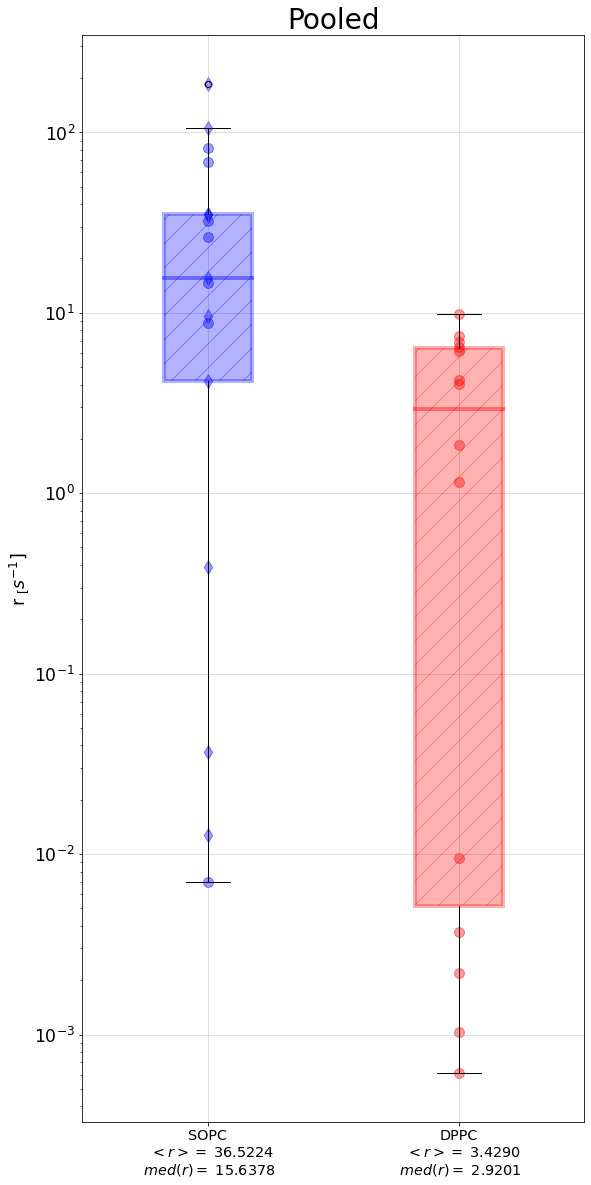

In [10]:
# Extract the logistic parameters excluding the DPPC curve
r_sopc = np.array([parameter[1] for parameter in parameters_Rlogistic_sopc2 + parameters_Rlogistic_sopc3])
k_sopc = np.array([parameter[2] for parameter in parameters_Rlogistic_sopc2 + parameters_Rlogistic_sopc3])
a_sopc = np.array([parameter[0] for parameter in parameters_Rlogistic_sopc2 + parameters_Rlogistic_sopc3])
u_sopc = np.array([parameter[3] for parameter in parameters_Rlogistic_sopc2 + parameters_Rlogistic_sopc3])

r_dppc = np.array([parameter[1] for parameter in parameters_Rlogistic_dppc2 + parameters_Rlogistic_dppc3])
k_dppc = np.array([parameter[2] for parameter in parameters_Rlogistic_dppc2 + parameters_Rlogistic_dppc3])
a_dppc = np.array([parameter[0] for parameter in parameters_Rlogistic_dppc2 + parameters_Rlogistic_dppc3])
u_dppc = np.array([parameter[3] for parameter in parameters_Rlogistic_dppc2 + parameters_Rlogistic_dppc3])


plt.figure(figsize=(9,20))     # 16.54,20

# Define the boxes
bp = plt.boxplot([r_sopc, r_dppc],
                labels = [f'SOPC\n  $<r>=$ {r_sopc.mean():.4f}\n $med(r)=$ {np.median(r_sopc):.4f}',
                          f'DPPC\n  $<r>=$ {r_dppc.mean():.4f}\n $med(r)=$ {np.median(r_dppc):.4f}'],
                whis = 3.5,
                widths = 0.35,
                patch_artist=True);

# Customize the boxes
bp['boxes'][0].set(color = 'blue', hatch = '/', linewidth=4, alpha = 0.3)
bp['boxes'][1].set(color = 'red' , hatch = '/', linewidth=4, alpha = 0.3)

# Customize the Median line
bp['medians'][0].set(color = 'blue', linewidth=4, alpha = 0.4)
bp['medians'][1].set(color = 'red' , linewidth=4, alpha = 0.4)


# Plot the scattered points
plt.scatter(x = [1] * len(r_sopc3), y = r_sopc3, color='blue', s=100, alpha=0.4, label='Mouse  Ecad on SOPC 3%', marker='d')
plt.scatter(x = [1] * len(r_sopc2), y = r_sopc2, color='blue', s=100, alpha=0.4, label='Human Ecad on SOPC 2%')
plt.scatter(x = [2] * len(r_dppc3), y = r_dppc3, color='red' , s=100, alpha=0.4, label='Human Ecad on DPPC 3%')
plt.scatter(x = [2] * len(r_dppc2), y = r_dppc2, color='red' , s=100, alpha=0.4, label='Human Ecad on DPPC 2%')

# Customize the table
plt.ylabel('r $_[s^{-1}$]', fontsize= 'xx-large')
plt.xticks(fontsize= 'x-large')
plt.yticks(fontsize= 'xx-large')
plt.yscale('log')
plt.title('Pooled', fontsize=28)
plt.grid(alpha=0.5)
# plt.legend(fontsize='x-large')

# Save the figure
plt.savefig("Results/boxplot_Rgrowth_rate_mixed")
plt.show()

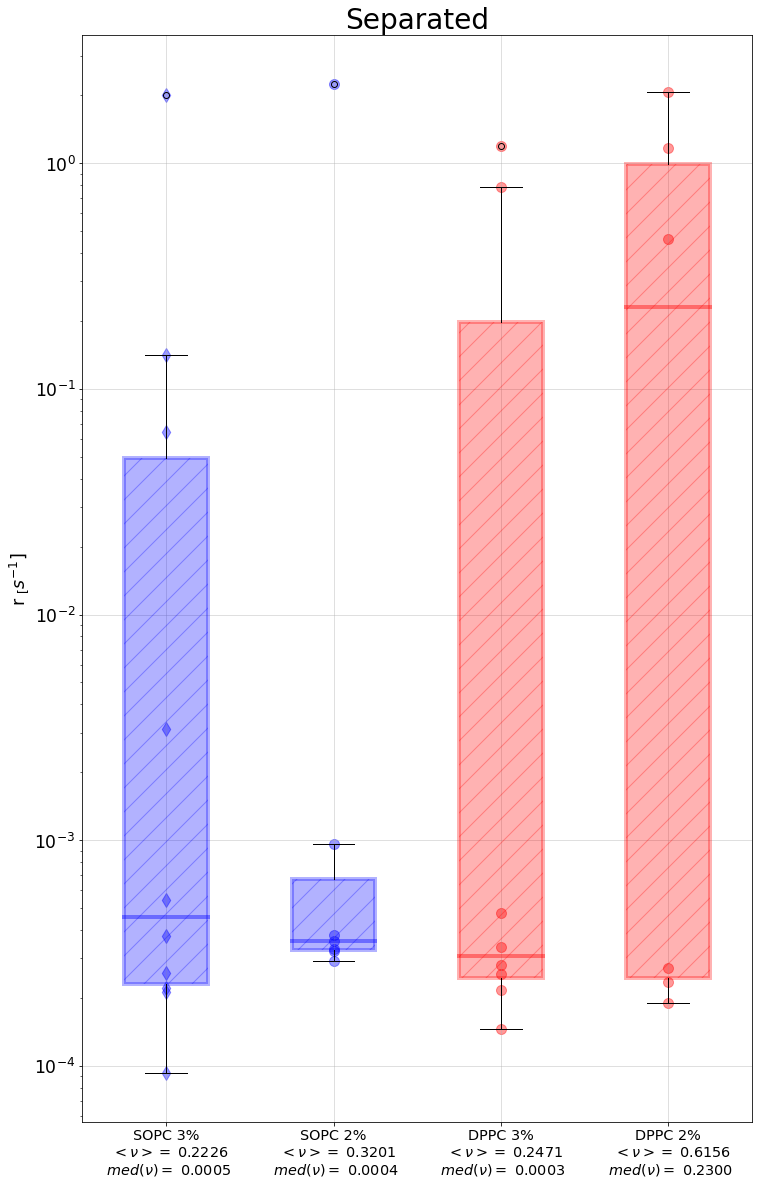

In [11]:
plt.figure(figsize=(12,20))     # 16.54,20

# Define the boxes
bp = plt.boxplot([u_sopc3, u_sopc2, u_dppc3, u_dppc2],
                labels = [f'SOPC 3%\n  $<\u03BD>=$ {u_sopc3.mean():.4f}\n $med(\u03BD)=$ {np.median(u_sopc3):.4f}',
                          f'SOPC 2%\n  $<\u03BD>=$ {u_sopc2.mean():.4f}\n $med(\u03BD)=$ {np.median(u_sopc2):.4f}',
                          f'DPPC 3%\n  $<\u03BD>=$ {u_dppc3.mean():.4f}\n $med(\u03BD)=$ {np.median(u_dppc3):.4f}',
                          f'DPPC 2%\n  $<\u03BD>=$ {u_dppc2.mean():.4f}\n $med(\u03BD)=$ {np.median(u_dppc2):.4f}'],
                whis = 3.5,
                widths = 0.5,
                patch_artist=True);

# Customize the boxes
bp['boxes'][0].set(color='blue', hatch='/', linewidth=4, alpha=0.3)
bp['boxes'][1].set(color='blue', hatch='/', linewidth=4, alpha=0.3)
bp['boxes'][2].set(color='red' , hatch='/', linewidth=4, alpha=0.3)
bp['boxes'][3].set(color='red' , hatch='/', linewidth=4, alpha=0.3)

# Customize the Median line
bp['medians'][0].set(color='blue', linewidth=4, alpha=0.4)
bp['medians'][1].set(color='blue', linewidth=4, alpha=0.4)
bp['medians'][2].set(color='red' , linewidth=4, alpha=0.4)
bp['medians'][3].set(color='red' , linewidth=4, alpha=0.4)


# Plot the scattered points
plt.scatter(x = [1] * len(u_sopc3), y = u_sopc3, color='blue', s=100, alpha = 0.4, label='Mouse  Ecad on SOPC 3%', marker='d')
plt.scatter(x = [2] * len(u_sopc2), y = u_sopc2, color='blue', s=100, alpha = 0.4, label='Human Ecad on SOPC 2%')
plt.scatter(x = [3] * len(u_dppc3), y = u_dppc3, color='red' , s=100, alpha = 0.4, label='Human Ecad on DPPC 3%')
plt.scatter(x = [4] * len(u_dppc2), y = u_dppc2, color='red' , s=100, alpha = 0.4, label='Human Ecad on DPPC 2%')

# Customize the table
plt.ylabel('r $_[s^{-1}$]', fontsize= 'xx-large')
plt.xticks(fontsize= 'x-large')
plt.yticks(fontsize= 'xx-large')
plt.yscale('log')
plt.title('Separated', fontsize=28)
plt.grid(alpha=0.5)
#plt.legend(fontsize='x-large')

# Save the figure
plt.savefig("Results/boxplot_u_separated")
plt.show()

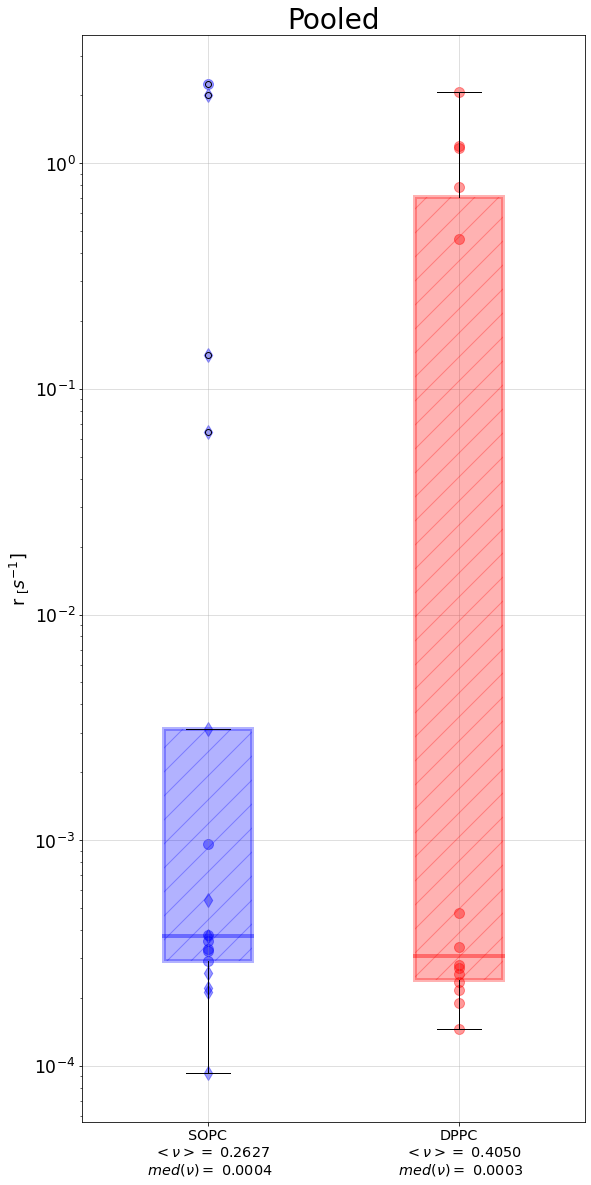

In [12]:
plt.figure(figsize=(9,20))     # 16.54,20

# Define the boxes
bp = plt.boxplot([u_sopc, u_dppc],
                labels = [f'SOPC\n  $<\u03BD>=$ {u_sopc.mean():.4f}\n $med(\u03BD)=$ {np.median(u_sopc):.4f}',
                          f'DPPC\n  $<\u03BD>=$ {u_dppc.mean():.4f}\n $med(\u03BD)=$ {np.median(u_dppc):.4f}'],
                whis = 3.5,
                widths = 0.35,
                patch_artist=True);

# Customize the boxes
bp['boxes'][0].set(color = 'blue', hatch = '/', linewidth=4, alpha = 0.3)
bp['boxes'][1].set(color = 'red' , hatch = '/', linewidth=4, alpha = 0.3)

# Customize the Median line
bp['medians'][0].set(color = 'blue', linewidth=4, alpha = 0.4)
bp['medians'][1].set(color = 'red' , linewidth=4, alpha = 0.4)


# Plot the scattered points
plt.scatter(x = [1] * len(u_sopc3), y = u_sopc3, color='blue', s=100, alpha = 0.4, label= f'Mouse  Ecad on SOPC 3%', marker='d')
plt.scatter(x = [1] * len(u_sopc2), y = u_sopc2, color='blue', s=100, alpha = 0.4, label= f'Human Ecad on SOPC 2%')
plt.scatter(x = [2] * len(u_dppc3), y = u_dppc3, color='red' , s=100, alpha = 0.4, label= f'Human Ecad on DPPC 3%')
plt.scatter(x = [2] * len(u_dppc2), y = u_dppc2, color='red' , s=100, alpha = 0.4, label= f'Human Ecad on DPPC 2%')

# Customize the table
plt.ylabel('r $_[s^{-1}$]', fontsize= 'xx-large')
plt.xticks(fontsize= 'x-large')
plt.yticks(fontsize= 'xx-large')
plt.yscale('log')
plt.title('Pooled', fontsize=28)
plt.grid(alpha=0.5)
# plt.legend(fontsize='x-large')

# Save the figure
plt.savefig("Results/boxplot_u_mixed")
plt.show()